<a href="https://colab.research.google.com/github/Farsanamajid/CNN/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TensorFlow and Keras**: TensorFlow is a popular deep learning library, and Keras is its high-level API. We use these to build and train our CNN model.

**Matplotlib**: This is used for plotting graphs and visualizing data, such as accuracy and loss curves.

In [19]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



**MNIST Dataset**: MNIST is a dataset of 70,000 grayscale images of handwritten digits (0-9), where each image is 28x28 pixels.

**Loading Data** : The load_data() function loads the dataset into training and testing sets. x_train and x_test are the images, while y_train and y_test are the corresponding labels (the actual digit each image represents).

In [20]:
tf.keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [21]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(y_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

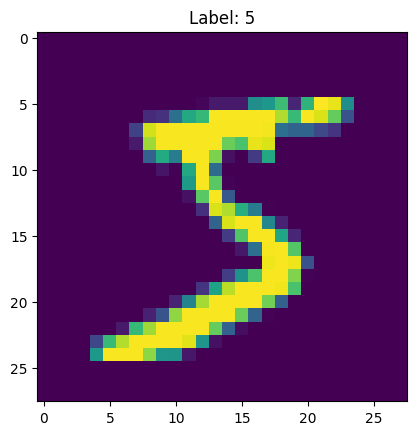

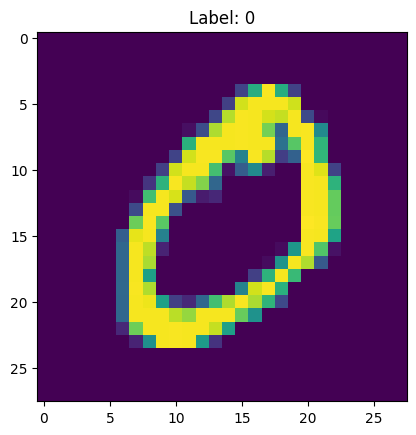

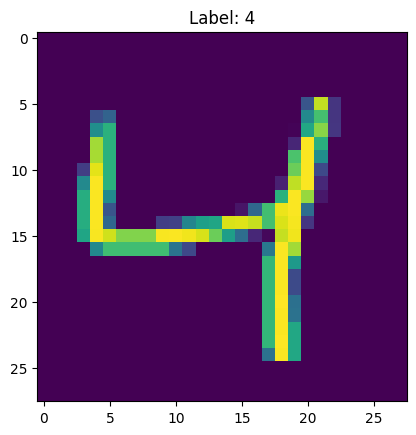

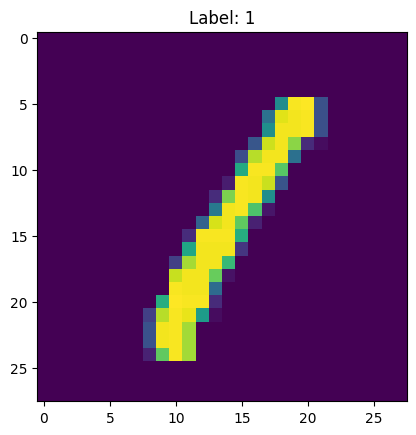

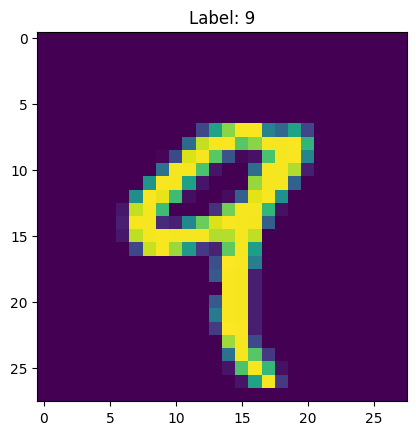

In [22]:


# Display the first 10 images and labels from the training set
for i in range(5): # 0,1..9
    plt.imshow(x_train[i])  # Display the i-th image
    plt.title("Label: " + str(y_train[i]))  # Display the corresponding label
    plt.show()                           # Show the image


**Normalization**: Pixel values in the images range from 0 to 255. We normalize them to a range of 0 to 1 by dividing by 255.0. This helps the model learn more effectively.

**astype('float32')**: Ensures the pixel values are treated as floating-point numbers, which is important for calculations during training.

In [23]:
# Normalize the images to values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255



**Reshaping**: The images are originally 28x28, but we need to add a channel dimension to indicate they are grayscale (single channel). After reshaping, the images have the shape (28, 28, 1), where 1 is the channel dimension.

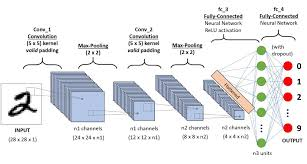

In [24]:
x_train.shape[0]

60000

In [25]:
# Reshape the images to add the channel dimension (since they are grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))




**One-Hot Encoding**: The labels are integers (0-9). One-hot encoding transforms them into a binary matrix. For example, the label 2 becomes
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]. This is necessary for the categorical cross-entropy loss function used during training.

In [26]:
y_train = tf.keras.utils.to_categorical(y_train, 10) #0,1,2,3,4,5,6,7,8,9
y_test = tf.keras.utils.to_categorical(y_test, 10)


**Sequential Model**: We use Sequential to build a linear stack of layers for the CNN.

**Conv2D Layer**: Applies 2D convolution over the input image. The first layer has 32 filters, each of size 3x3, and uses the ReLU activation function. This detects features such as edges.

*Input Shape* : The first layer's input shape is (28, 28, 1), corresponding to the image dimensions and channel.

**MaxPooling2D Layer** : Reduces the spatial dimensions (height and width) by taking the maximum value in a 2x2 window. This helps in reducing the computational complexity and overfitting.

**Flatten Layer**: Flattens the 2D output from the convolutional layers into a 1D vector, preparing it for the dense (fully connected) layers.

**Dense Layer**: A fully connected layer where each neuron is connected to all the neurons in the previous layer. The first dense layer has 64 units and uses the ReLU activation function.

**Output Layer**: The final dense layer has 10 units (one for each digit) and uses the softmax activation function, which outputs probabilities for each class.

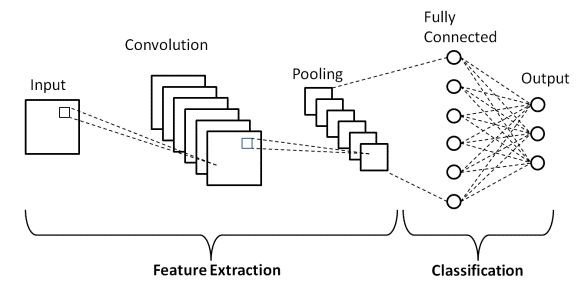

1. **Convolution** Layer: The Feature Detector
Real-life Example: Recognizing Patterns in Photos

Imagine you’re looking at a photo of a cat. Without seeing the entire cat, you can recognize parts of it like the eyes, ears, or tail.

Technical Concept:
A convolution layer applies filters (small matrices) to the input image, detecting features like edges or textures. Each filter detects different patterns.


2. Pooling Layer: The Simplifier
Real-life Example: Summarizing Information

Think about summarizing a long article. You pick out the most important sentences or ideas and ignore the rest.
Analogy: The pooling layer summarizes the image by reducing its size while preserving the most important information. This is like summarizing the key points from an article.
Technical Concept:

Pooling (e.g., max pooling) reduces the spatial size of the representation, making the network more efficient while retaining the essential features. Max pooling, for instance, picks the maximum value in a region, just like picking the most prominent feature.
3. Flattening Layer: The Connector
Real-life Example: Laying Out a Puzzle

Imagine you have a puzzle that you’ve completed in sections. Now, to see the whole picture, you need to lay out all the pieces in a straight line.
Analogy: The flattening layer takes the pooled feature maps (puzzle pieces) and lays them out in a single, flat array, making it easier to process in the next stage.
Technical Concept:

Flattening converts the 2D feature maps into a 1D vector. This vector can then be fed into fully connected layers.
4. Fully Connected Layer: The Decision Maker
Real-life Example: Making a Final Decision

After gathering all the information, you decide what you’re looking at. Is it a cat or a dog?
Analogy: The fully connected layer takes all the detected features and decides which class (e.g., cat, dog) the image belongs to. It’s like making a final decision after considering all the details.
Technical Concept:

Fully connected layers combine the features to make a final classification decision, assigning probabilities to different classes (e.g., 80% cat, 20% dog).

**models.Sequential([...]):**  
This line initializes a Sequential model, which is a linear stack of layers. The layers are added in sequence, from input to output.
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):

**Conv2D(32, (3, 3))**: This is a 2D convolutional layer with 32 filters, each with a size of 3x3. The purpose of this layer is to detect features in the input image, such as edges or textures.

activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity, allowing the model to learn more complex patterns.
input_shape=(28, 28, 1): This specifies the shape of the input data. The input images are 28x28 pixels with 1 channel (grayscale).
**layers.MaxPooling2D((2, 2)):**

This is a max-pooling layer with a pool size of 2x2. It reduces the spatial dimensions of the output from the previous convolutional layer by taking the maximum value in each 2x2 block. This helps in reducing the computational load and making the model more robust to small translations in the input image.

**layers.Conv2D(64, (3, 3), activation='relu'):**

This is another convolutional layer, but with 64 filters of size 3x3. Increasing the number of filters allows the network to learn more complex features.
The activation function remains ReLU for non-linearity.

**layers.MaxPooling2D((2, 2)):**

Another max-pooling layer to further reduce the spatial dimensions and complexity of the feature maps.


**layers.Conv2D(64, (3, 3), activation='relu'):**

A third convolutional layer with 64 filters of size 3x3. This layer continues to extract even higher-level features from the image.
layers.Flatten():

This layer flattens the 2D feature maps into a 1D vector. This is necessary before feeding the data into fully connected (dense) layers.


**layers.Dense(64, activation='relu'):**

A dense (fully connected) layer with 64 neurons. Each neuron in this layer is connected to all the neurons in the previous layer. The ReLU activation function is used again to introduce non-linearity.


**layers.Dense(10, activation='softmax'):**

The output layer with 10 neurons, one for each class (e.g., digits 0-9 in the case of MNIST).
activation='softmax': The softmax activation function converts the output of the layer into a probability distribution, with each of the 10 output values representing the probability that the input image belongs to that class.


In [27]:
model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


**Compile Method:** Prepares the model for training by specifying the optimizer, loss function, and metrics.

**Optimizer**: Adam is an efficient variant of gradient descent that adjusts the learning rate during training.

**Loss Function**: categorical_crossentropy is used for multi-class classification problems. It compares the predicted probabilities to the true labels.

**Metrics**: accuracy is used to monitor the fraction of correct predictions.

In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**fit Method**: Trains the model on the training data.
Epochs: The number of times the model will cycle through the entire training dataset. Here, we use 5 epochs.

**epoch** an epoch refers to one complete pass through the entire training dataset. During each epoch, the model's weights are updated based on the training data. The number of epochs is a hyperparameter that specifies how many times the learning algorithm will work through the entire training dataset.

**Validation Data**: x_test and y_test are used to validate the model's performance after each epoch. This helps monitor overfitting.

In [29]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9024 - loss: 0.3130 - val_accuracy: 0.9836 - val_loss: 0.0512
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9846 - loss: 0.0481 - val_accuracy: 0.9890 - val_loss: 0.0307
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9893 - val_loss: 0.0348
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9918 - loss: 0.0256 - val_accuracy: 0.9907 - val_loss: 0.0283
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9908 - val_loss: 0.0311


**evaluate Method:** Evaluates the model on the test dataset, returning the loss and accuracy.

**Verbose**: Controls the verbosity of the output. verbose=2 provides more detailed output without showing progress bars.

Test Accuracy: The accuracy on the test data is printed, showing how well the model generalizes to unseen data.

In [30]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')


313/313 - 3s - 11ms/step - accuracy: 0.9908 - loss: 0.0311

Test accuracy: 0.9908


In [31]:
history.history['accuracy'] #train accuracy

[0.9581000208854675,
 0.9856500029563904,
 0.9893666505813599,
 0.9918166399002075,
 0.9936833381652832]

In [32]:
history.history['val_accuracy'] #validation accuracy

[0.9836000204086304,
 0.9890000224113464,
 0.989300012588501,
 0.9907000064849854,
 0.9908000230789185]

**History Object**: The history object returned by model.fit() contains the loss and accuracy values for each epoch during training.

**Plotting Accuracy**: We plot the training and validation accuracy over epochs to see how the model improves.

**Plotting Loss**: Similarly, we plot the loss to check if it decreases over time, indicating better model performance.

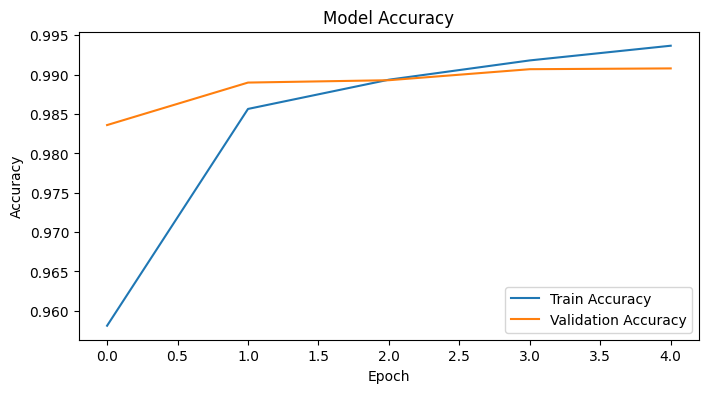

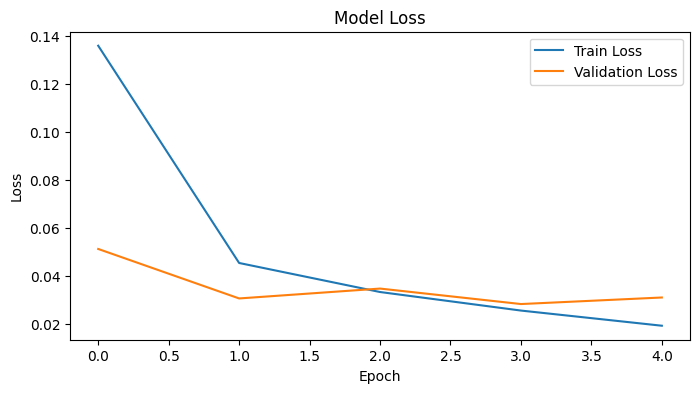

In [33]:
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


**save the model**

In [34]:
# Save the model
model.save('modelcnn.h5')  # Save the model to a file named 'my_model.h5' hdf5


**test with unseen data**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


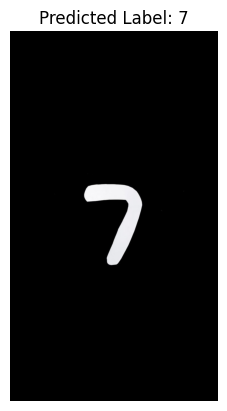

In [35]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model (replace 'model.h5' with your actual model file)
model = tf.keras.models.load_model('modelcnn.h5')

# Load and preprocess the new image
def preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img = img.resize((28, 28))  # Resize image to 28x28 pixels
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array / 255.0  # Normalize the image
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for the model
    return img_array

# Path to the new image
image_path = '/content/7 image.jpeg'
preprocessed_image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(preprocessed_image)
predicted_label = np.argmax(prediction, axis=1)

# Display the image and the prediction
img = Image.open(image_path)
plt.imshow(img, cmap='gray')
plt.title(f"Predicted Label: {predicted_label[0]}")
plt.axis('off')
plt.show()
